*1014 파이썬 머신러닝 완벽가이드 p.267~p.295*

*(ch4. 9~10)*

# **04. 분류**



> **09. 분류 실습 - 캐글 산탄데르 고객 만족 예측**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (29547, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0.0


In [2]:
# 371개의 피처 중 111개의 피처가 float형, 260개의 피처가 int형이고, Null 값은 없음.
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29547 entries, 0 to 29546
Columns: 371 entries, ID to TARGET
dtypes: float64(276), int64(95)
memory usage: 83.6 MB


In [3]:
# 대부분이 만족, 불만족인 고객은 4%로 얼마 안 됨.
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format(unsatisfied_cnt/total_cnt))

TARGET
0.0    28348
1.0     1198
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,29547.000000,29547.000000,29547.000000,29547.000000,29547.000000,29547.000000,29547.000000,29547.000000,29547.000000,29547.000000,...,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,2.954600e+04,29546.000000
mean,29602.044641,-1587.959590,33.267574,94.271264,72.630820,121.425828,4.120362,7.114298,0.681216,0.837577,...,5.746077,0.654663,13.558213,9.419966,43.869496,2.475095,91.452870,63.072681,1.182704e+05,0.040547
std,17066.097405,39852.416267,12.981542,2080.875600,338.148344,560.220612,102.131960,160.757845,45.040884,49.216290,...,364.576945,58.543338,1010.410757,675.621959,2887.663410,167.093353,5017.026045,3053.147623,2.169317e+05,0.197241
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,14810.500000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.795431e+04,0.000000
50%,29714.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064505e+05,0.000000
75%,44376.500000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.193286e+05,0.000000
max,59103.000000,235.000000,102.000000,210000.000000,12888.030000,21024.810000,7904.220000,11073.570000,6600.000000,6600.000000,...,44725.830000,6643.290000,138831.630000,91778.730000,438329.220000,18928.590000,681462.900000,374947.530000,2.203474e+07,1.000000


In [5]:
# var3 칼럼에서 -999999값이 116개임. NaN이나 특정 예외 값을 -999999로 변환한 것으로 보임.
cust_df.var3.value_counts()

,count
var3,
2,28856
-999999,47
8,45
9,44
3,44
...,...
177,1
98,1
49,1


In [6]:
# 다른 값과 -999999는 편차가 너무 크므로 가장 많은 값인 2로 변환.
# ID 피처는 단순 식별자에 불과하므로 드랍.
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 칼럼은 DataFrame의 맨 마지막에 위치에 칼럼 위치 -1로 분리.
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(29547, 369)


In [7]:
# 비대칭한 데이터 세트이므로 클래스인 Target값 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인.
# 학습과 테스트 데이터 세트 모두 TARGET의 값 분포가 원본 데이터와 유사하게 전체 데이터의 4% 정도의 불만족 값(값 1)으로 만들어짐.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape: {0}, 테스트 세트 Shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape: (23637, 369), 테스트 세트 Shape: (5910, 369)
학습 세트 레이블 값 분포 비율
TARGET
0.0    0.959724
1.0    0.040276
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0.0    0.958369
1.0    0.041631
Name: count, dtype: float64


In [8]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

**[ XGBoost 모델 학습과 하이퍼 파라미터 튜닝 ]**

- 사이킷런 래퍼인 XGBClassifier 기반으로 학습 수행

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_test = X_test[y_test.notnull()]
y_test = y_test[y_test.notnull()]

# n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156, early_stopping_rounds=100, eval_metric='auc')
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83639	validation_1-auc:0.81386
[1]	validation_0-auc:0.83690	validation_1-auc:0.81672
[2]	validation_0-auc:0.83751	validation_1-auc:0.81803
[3]	validation_0-auc:0.84027	validation_1-auc:0.81586
[4]	validation_0-auc:0.84209	validation_1-auc:0.81859
[5]	validation_0-auc:0.84777	validation_1-auc:0.82101
[6]	validation_0-auc:0.85079	validation_1-auc:0.82169
[7]	validation_0-auc:0.85189	validation_1-auc:0.82247
[8]	validation_0-auc:0.85300	validation_1-auc:0.82207
[9]	validation_0-auc:0.85294	validation_1-auc:0.82100
[10]	validation_0-auc:0.85775	validation_1-auc:0.82173
[11]	validation_0-auc:0.85816	validation_1-auc:0.82163
[12]	validation_0-auc:0.85841	validation_1-auc:0.82162
[13]	validation_0-auc:0.85841	validation_1-auc:0.82163
[14]	validation_0-auc:0.85885	validation_1-auc:0.81941
[15]	validation_0-auc:0.85966	validation_1-auc:0.81879
[16]	validation_0-auc:0.85974	validation_1-auc:0.81878
[17]	validation_0-auc:0.86105	validation_1-auc:0.82117
[18]	validation_0-au

In [12]:
# HyperOpt을 이용해서 베이지안 최적화 기반으로 XGBoost의 하이퍼 파라미터 튜닝 수행.
from hyperopt import hp

# max_depth는 5에서 15까지 1 간격으로, min_child_weight는 1에서 6까지 1 간격으로
# colsample_tree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색하는 검색공간 설정.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_tree': hp.uniform('colsample_tree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [13]:
# 3 Fold 교차검증을 이용해 평균 ROC-AUC값을 반환하되 -1을 곱해주어 최대 ROC-AUC값이 최소 반환값이 되도록 목적함수 설정.
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환.
def objective_func(search_space):
  # n_estimators는 100, early stopping은 30회로 설정
  xgb_clf = XGBClassifier(n_estimators=100,
                          early_stopping_rounds=30,
                          eval_metric='auc',
                          max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_tree=search_space['colsample_tree'],
                          learning_rate=search_space['learning_rate'])
  # 3개 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
  roc_auc_list = []

  # 3개 k-fold 방식 적용
  kf = KFold(n_splits=3)
  # X_train을 다시 학습과 검증용 데이터로 분리
  for tr_index, val_index in kf.split(X_train):
    # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    # 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
    xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

    # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)

    # 3개의 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)


In [14]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.83421	validation_1-auc:0.77577
[1]	validation_0-auc:0.84104	validation_1-auc:0.78263
[2]	validation_0-auc:0.84551	validation_1-auc:0.79215
[3]	validation_0-auc:0.85023	validation_1-auc:0.79404
[4]	validation_0-auc:0.85338	validation_1-auc:0.79733
[5]	validation_0-auc:0.85867	validation_1-auc:0.79586
[6]	validation_0-auc:0.86007	validation_1-auc:0.79606
[7]	validation_0-auc:0.86131	validation_1-auc:0.79594
[8]	validation_0-auc:0.86328	validation_1-auc:0.79739
[9]	validation_0-auc:0.86501	validation_1-auc:0.79773
[10]	validation_0-auc:0.86511	validation_1-auc:0.79696
[11]	validation_0-auc:0.86723	validation_1-auc:0.79807
[12]	validation_0-auc:0.86786	validation_1-auc:0.79900
[13]	validation_0-auc:0.86964	validation_1-auc:0.79957
[14]	validation_0-auc:0.87092	validation_1-auc:0.80110
[15]	validation_0-auc:0.87282	validation_1-auc:0.80233
[16]	validation_0-auc:0.87397	validation_1-auc:0.80306
[17]	validation_0-auc:0.87616	validation_1-auc:0.80327
[18]	validation_0-au

In [15]:
# 도출된 최적의 하이퍼 파라미터를 기반으로 XGBClassifier을 재학습, 테스트 데이터 세트에서 ROC-AUC 측정

# n_estimator는 500으로 증가
# early_stopping_rounds는 100
# evaluation metric은 auc 설정
xgb_clf = XGBClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='auc',
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        learning_rate=round(best['learning_rate'], 5),
                        colsample_tree=round(best['colsample_tree'], 5)
                        )

xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81435	validation_1-auc:0.80755
[1]	validation_0-auc:0.82917	validation_1-auc:0.82207
[2]	validation_0-auc:0.83205	validation_1-auc:0.82245
[3]	validation_0-auc:0.83734	validation_1-auc:0.82483
[4]	validation_0-auc:0.84087	validation_1-auc:0.82548
[5]	validation_0-auc:0.84223	validation_1-auc:0.82133
[6]	validation_0-auc:0.84430	validation_1-auc:0.82353
[7]	validation_0-auc:0.84680	validation_1-auc:0.82249
[8]	validation_0-auc:0.84739	validation_1-auc:0.82216
[9]	validation_0-auc:0.84836	validation_1-auc:0.82074
[10]	validation_0-auc:0.84961	validation_1-auc:0.81927
[11]	validation_0-auc:0.85115	validation_1-auc:0.81911
[12]	validation_0-auc:0.85208	validation_1-auc:0.81933
[13]	validation_0-auc:0.85278	validation_1-auc:0.81912
[14]	validation_0-auc:0.85365	validation_1-auc:0.81859
[15]	validation_0-auc:0.85542	validation_1-auc:0.81943
[16]	validation_0-auc:0.85619	validation_1-auc:0.81933
[17]	validation_0-auc:0.85837	validation_1-auc:0.82253
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

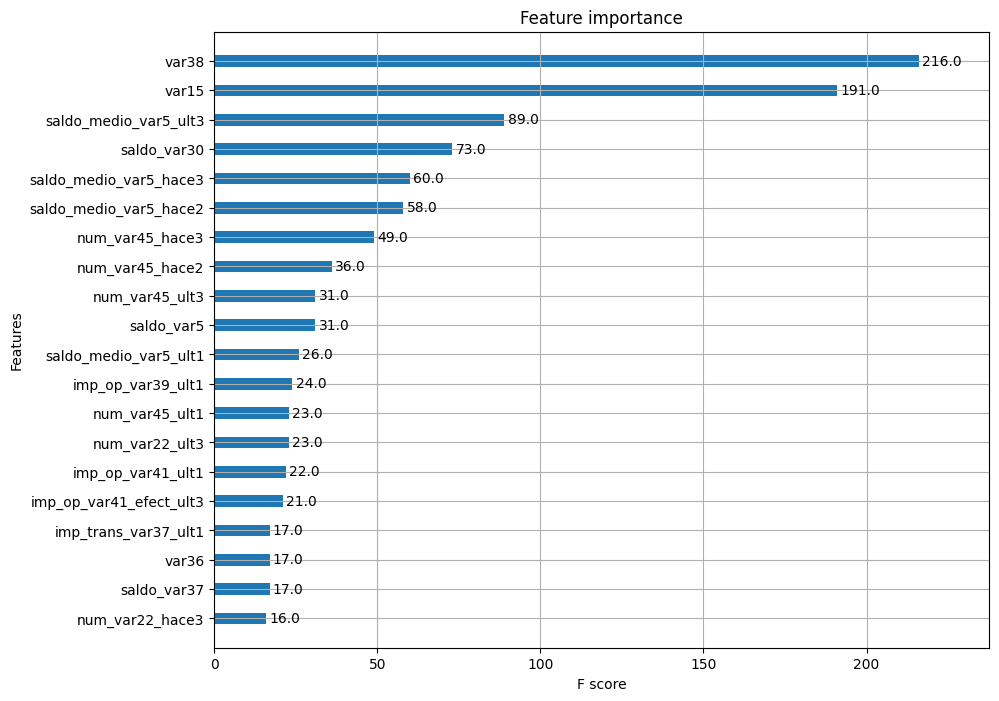

In [16]:
# 튜닝된 모델에서 각 피처의 중요도를 xgboost 모듈의 plot_importance() 메서드로 나타내기
# var38, var15 피처가 XGBoost의 예측 성능을 좌우하는 중요한 피처로 보임
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

**[ LightGBM 모델 학습과 하이퍼 파라미터 튜닝 ]**

In [17]:
pip install lightgbm==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [18]:
# n_estimators는 500, early_stopping_rounds는 100, eval_metric는 'auc'로 설정하여 학습 진행
# 테스트 데이터 세트로 평가된 roc-auc값은 0.8384
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='auc')

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[1]	training's binary_logloss: 0.159867	valid_1's binary_logloss: 0.156182
[2]	training's binary_logloss: 0.152854	valid_1's binary_logloss: 0.151932
[3]	training's binary_logloss: 0.147784	valid_1's binary_logloss: 0.149116
[4]	training's binary_logloss: 0.143912	valid_1's binary_logloss: 0.146948
[5]	training's binary_logloss: 0.140836	valid_1's binary_logloss: 0.145045
[6]	training's binary_logloss: 0.138058	valid_1's binary_logloss: 0.143563
[7]	training's binary_logloss: 0.135451	valid_1's binary_logloss: 0.142499
[8]	training's binary_logloss: 0.133273	valid_1's binary_logloss: 0.141636
[9]	training's binary_logloss: 0.13128	valid_1's binary_logloss: 0.140965
[10]	training's binary_logloss: 0.129632	valid_1's binary_logloss: 0.140525
[11]	training's binary_logloss: 0.12801	valid_1's binary_logl

In [19]:
# HyperOpt를 이용하여 검색공간 설정
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [20]:
# 목적함수 생성
def objective_func(search_space):
  # n_estimators는 100, early stopping은 30회로 설정
  lgbm_clf = LGBMClassifier(n_estimators=100, early_stopping_rounds=30, eval_metric='auc',
                            num_leaves=int(search_space['num_leaves']),
                            max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                            subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate'])
  # 3개 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
  roc_auc_list = []

  # 3개 k-fold 방식 적용
  kf = KFold(n_splits=3)
  # X_train을 다시 학습과 검증용 데이터로 분리
  for tr_index, val_index in kf.split(X_train):
    # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    # 추출된 학습과 검증 데이터로 LGBMClassifier 학습 수행.
    lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

    # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
    score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)

    # 3개의 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [21]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals에 지정된 횟수만큼 반복 후 목적 함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수 지정
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[1]	training's binary_logloss: 0.168237	valid_1's binary_logloss: 0.163438
[2]	training's binary_logloss: 0.166063	valid_1's binary_logloss: 0.161895
[3]	training's binary_logloss: 0.164084	valid_1's binary_logloss: 0.160516
[4]	training's binary_logloss: 0.162317	valid_1's binary_logloss: 0.159308
[5]	training's binary_logloss: 0.16067	valid_1's binary_logloss: 0.158235
[6]	training's binary_logloss: 0.159157	valid_1's binary_logloss: 0.157216
[7]	training's binary_logloss: 0.157722	valid_1's binary_logloss: 0.156326
[8]	training's binary_logloss: 0.156352	valid_1's binary_logloss: 0.155457
[9]	training's binary_logloss: 0.155091	valid_1's binary_logloss: 0.154563
[10]	training's binary_logloss: 0.153924	valid_1's binary_logloss: 0.153841
[11]	training's binary_logloss: 0.152816	valid_1's binary_loglos

In [22]:
# 도출된 최적의 하이퍼 파라미터를 기반으로 XGBClassifier을 재학습, 테스트 데이터 세트에서 ROC-AUC 측정
# n_estimator는 500으로 증가
# early_stopping_rounds는 100
# evaluation metric은 auc로 설정.
lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='auc',
                          num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'],5),
                          learning_rate=round(best['learning_rate'], 5))

lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[1]	training's binary_logloss: 0.153759	valid_1's binary_logloss: 0.152891
[2]	training's binary_logloss: 0.145906	valid_1's binary_logloss: 0.147906
[3]	training's binary_logloss: 0.140273	valid_1's binary_logloss: 0.145035
[4]	training's binary_logloss: 0.136104	valid_1's binary_logloss: 0.143151
[5]	training's binary_logloss: 0.132807	valid_1's binary_logloss: 0.14159
[6]	training's binary_logloss: 0.129862	valid_1's binary_logloss: 0.140371
[7]	training's binary_logloss: 0.127249	valid_1's binary_logloss: 0.139718
[8]	training's binary_logloss: 0.124864	valid_1's binary_logloss: 0.139214
[9]	training's binary_logloss: 0.122676	valid_1's binary_logloss: 0.139199
[10]	training's binary_logloss: 0.120652	valid_1's binary_logloss: 0.138881
[11]	training's binary_logloss: 0.118717	valid_1's binary_log

=> ROC-AUC가 하이퍼 파라미터 튜닝으로 개선

---



> **10. 분류 실습 - 캐글 신용카드 사기 검출**


- 언더 샘플링(Undersampling) :

    - 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소시키는 방식
    - 너무 많이 감소시켜서 오히려 데이터가 많은 레이블을 제대로 학습하지 못하는 문제가 발생할 수 있음.

- 오버 샘플링(Oversampling) :
    - 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식시키는 방식
    - 동일한 데이터를 단순히 증식하는 방법은 과적합(Overfitting)이 되기 때문에 원본 데이터의 피처 값들을 약간 변경하여 증식해야함.
    - 반드시 학습 데이터만 오버 샘플링해야 함. 검증 데이터나 테스트 데이터를 오버 샘플링할 경우 결국 원본 데이터 세트가 아닌 데이터로 테스트를 수행하기 때문에 올바른 검증/테스트가 될 수 없기 때문.
    - SMOTE 방법이 대표적. SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbor)을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식.



In [23]:
# SMOTE를 구현하는 imbalanced-learn 파이썬 패키지를 설치
!pip install imbalanced-learn

In [24]:
# 데이터 일차 가공 및 모델 학습/예측/평가
# Amount 피처는 신용카드 트랜잭션 금액, Class는 레이블 피처로 0의 경우 정상, 1의 경우 사기 트랜잭션을 의미.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [25]:
# 결측치는 없고, Class 레이블만 int형이고 나머지 피처들은 모두 float형.
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47628 non-null  int64  
 1   V1      47628 non-null  float64
 2   V2      47628 non-null  float64
 3   V3      47628 non-null  float64
 4   V4      47628 non-null  float64
 5   V5      47628 non-null  float64
 6   V6      47628 non-null  float64
 7   V7      47628 non-null  float64
 8   V8      47628 non-null  float64
 9   V9      47628 non-null  float64
 10  V10     47628 non-null  float64
 11  V11     47628 non-null  float64
 12  V12     47628 non-null  float64
 13  V13     47628 non-null  float64
 14  V14     47628 non-null  float64
 15  V15     47628 non-null  float64
 16  V16     47628 non-null  float64
 17  V17     47627 non-null  float64
 18  V18     47627 non-null  float64
 19  V19     47627 non-null  float64
 20  V20     47627 non-null  float64
 21  V21     47627 non-null  float64
 22

In [32]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
# 데이터 사전 가공 함수 get_preprocessed_df() 함수 생성
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  df_cleaned = df.dropna()
  return df_cleaned

In [33]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수 생성
def get_train_test_dataset(df=None):
  # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
  df_copy = get_preprocessed_df(df)

  # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]

  # train_test_split()으로 학습과 테스트 데이터 분할.
  # stratify=y_target으로 학습 데이터 세트와 테스트 데이터 세트의 레이블 값 분포도가 동일하도록 함.
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  # 학습과 테스트 데이터 세트 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [34]:
# 레이블의 학습 데이터에서 1값이 약 0.172%, 레이블의 테스트 데이터에서 1값이 약 0.173%로 큰 차이 없이 잘 분할됨.
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0.0    99.694043
1.0     0.305957
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0.0    99.692071
1.0     0.307929
Name: count, dtype: float64


In [35]:
# get_clf_eval() 함수를 이용해 평가 수행
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [36]:
# 로지스틱 회귀로 신용카드 사기 여부 예측하기
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[14239     6]
 [   14    30]]
정확도: 0.9986, 정밀도: 0.8333, 재현율: 0.6818, F1: 0.7500, AUC:0.9462


In [37]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력받아 학습/예측/평가를 수행하는 함수 생성
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [38]:
# LightGBMClassifier로 학습/예측/평가
# 본 데이터 세트는 극도로 불균형한 레이블 값 분포도를 가졌기 때문에, LGBM 객체 생성시 boost_from_average=False 파라미터 설정 필요.
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[14245     0]
 [    6    38]]
정확도: 0.9996, 정밀도: 1.0000, 재현율: 0.8636, F1: 0.9268, AUC:0.9816


**[ 데이터 분포도 변환 후 모델 학습/예측/평가 ]**

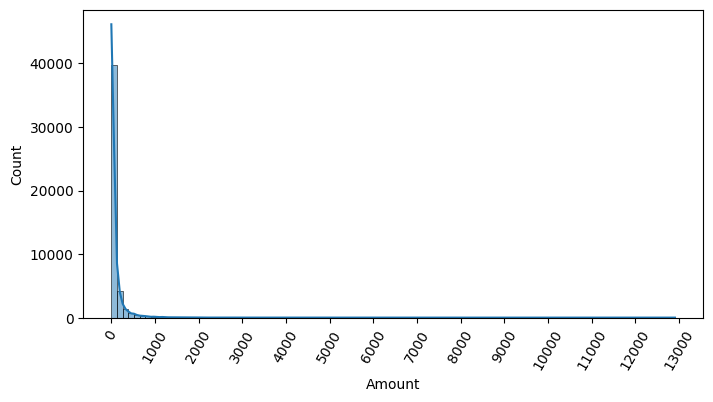

In [39]:
# Amount 피처의 분포도 확인
# 1000불 이하인 데이터가 대부분, 26000불까지 드물지만 사용. 꼬리가 긴 형태의 분포 곡선.
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

**[ 데이터 분포도 변환 후 모델 학습/예측/평가 - 정규분포 형태로 변환 ]**

In [44]:
# sklearn.preprocessing의 StandardScaler API 이용

from sklearn.preprocessing import StandardScaler

# 사이킷런 StandardScaler를 이용해 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame의 맨 앞 칼럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  # 기존 Time, Amount 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

  df_cleaned = df.dropna()
  return df_cleaned

In [45]:
# Amount 피처를 표준정규분포 형태로 변환한 후의 로지스틱 회귀와 LightGBM 모델 예측 성능
# 로지스틱 회귀의 경우 정밀도와 재현율이 조금 저하됨.
# LightGBM의 경우에도 정밀도와 재현율이 저하됨. 큰 성능상의 변경은 없음.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[14239     6]
 [   14    30]]
정확도: 0.9986, 정밀도: 0.8333, 재현율: 0.6818, F1: 0.7500, AUC:0.9462
### LightGBM 예측 성능###
오차 행렬
[[14245     0]
 [    6    38]]
정확도: 0.9996, 정밀도: 1.0000, 재현율: 0.8636, F1: 0.9268, AUC:0.9816


**[ 데이터 분포도 변환 후 모델 학습/예측/평가 - 로그 변환 ]**

In [48]:
# 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이의 log1p()를 이용해 Amount를 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  df_cleaned = df.dropna()
  return df_cleaned

In [49]:
# Amount 피처의 로그변환 후의 로지스틱 회귀와 LightGBM 모델 예측 성능
# 로지스틱 회귀의 경우 정밀도는 향상, 재현율은 저하.
# 레이블이 극도로 불균일한 데이터 세트에서 로지스틱 회귀는 데이터 변환 시 약간 불안정한 성능 결과를 보여줌.
# LightGBM의 경우 정밀도는 저하, 재현율은 향상.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('###LightGBM 예측 성능###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능###
오차 행렬
[[14239     6]
 [   14    30]]
정확도: 0.9986, 정밀도: 0.8333, 재현율: 0.6818, F1: 0.7500, AUC:0.9462
###LightGBM 예측 성능###
오차 행렬
[[14245     0]
 [    6    38]]
정확도: 0.9996, 정밀도: 1.0000, 재현율: 0.8636, F1: 0.9268, AUC:0.9816


**(로그 변환 후) 이상치 데이터 제거 후 모델 학습/예측/평가**

<Axes: >

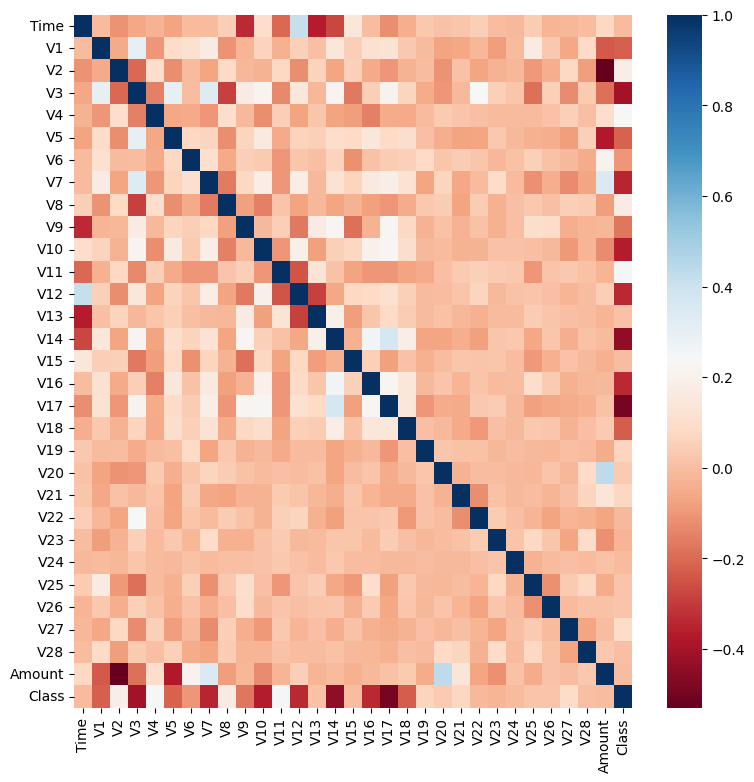

In [50]:
# 어떤 피처의 이상치 데이터를 검출할 것인지 선택하기 위해서 각 피처들의 레이블과의 상관성 살피기.
# 결정 레이블(Class) 피처와 (음의) 상관관계가 가장 높은 피처는 V14, V17. 이 중 V14에 대해서만 이상처 제거 수행.
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [63]:
# 이상치를 검출하는 함수 생성
import numpy as np

def get_outlier(df, column, weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [64]:
# V14 칼럼의 이상처 데이터의 index 추출
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([], dtype='int64')


In [65]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이의 log1p()를 이용해 Amount를 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  # 이상치 데이터 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [66]:
# Amount 피처를 로그 변환하고, V14 피처의 이상치 데이터를 삭제한 후의 로지스틱 회귀와 LightGBM 모델 예측 성능
# 로지스틱 회귀의 경우, LightGBM의 경우 둘 다 재현율이 크게 증가.
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[14239     6]
 [   13    31]]
정확도: 0.9987, 정밀도: 0.8378, 재현율: 0.7045, F1: 0.7654, AUC:0.9917
### LightGBM 예측 성능 ###
오차 행렬
[[14245     0]
 [    8    36]]
정확도: 0.9994, 정밀도: 1.0000, 재현율: 0.8182, F1: 0.9000, AUC:0.9807


In [67]:
# SMOTE 적용 후 레이블 값 0과 1의 분포가 동일하게 생성되어 데이터가 2배 가까이 증식됨.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 전 레이블 값 분포:\n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (33338, 29) (33338,)
SMOTE 적용 전 레이블 값 분포:
 Class
0.0    33236
1.0      102
Name: count, dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (66472, 29) (66472,)
SMOTE 적용 후 레이블 값 분포:
 Class
0.0    33236
1.0    33236
Name: count, dtype: int64


In [68]:
# SMOTE 적용 후의 로지스틱 회귀의 예측 성능
# SMOTE 적용 후 로지스틱 회귀모델로 학습시켰더니 정밀도는 크게 저하, 재현율은 크게 향상됨.
lr_clf = LogisticRegression(max_iter=1000)
# ftr_train과 tgt_train 인자값이 SMOTE로 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[14108   137]
 [    8    36]]
정확도: 0.9899, 정밀도: 0.2081, 재현율: 0.8182, F1: 0.3318, AUC:0.9657


=> 오버 샘플링으로 인해 실제 원본 데이터의 유형보다 너무나 많은 Class=1 데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class=1로 적용해서 정밀도가 급격히 떨어지게 됨.

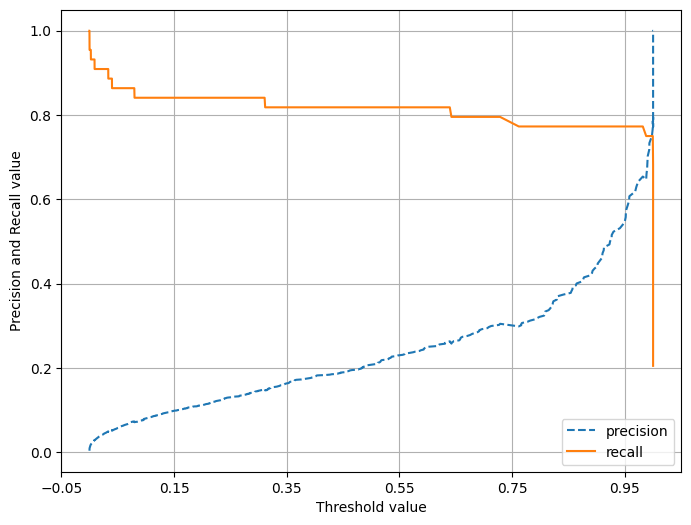

In [69]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값을 각각 plot으로 수행. 정밀도는 점선으로 표시.
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0: threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0: threshold_boundary], label='recall')

  # threshold값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.2),2))

  # X축, Y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

=> 0.99부터 재현율이 떨어지고 정밀도가 극단적으로 높아짐

In [70]:
# SMOTE 적용 후의 LightGBM의 예측 성능
# 재현율이 Amount 피처를 로그 변환하고, V14 피처의 이상치 데이터를 삭제했을 때였던 0.8288보다도 높아짐.
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[14243     2]
 [    6    38]]
정확도: 0.9994, 정밀도: 0.9500, 재현율: 0.8636, F1: 0.9048, AUC:0.9795


SMOTE를 적용하면 재현율을 높아지나, 정밀도는 낮아짐. 따라서 정밀도 지표보단 재현율 지표를 높이는 것이 중요한 목표인 경우에 SMOTE를 적용.